In [ ]:
import zipfile
import os

# Define paths
zip_path = "/content/tunnel-accident-detectio.v1i.coco.zip"  # Change this to your actual ZIP file name
extract_path = "/content/images_dataset"  # Change this if needed

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted successfully to: {extract_path}")


Dataset extracted successfully to: /content/images_dataset


In [ ]:
import os

# List extracted files
print("Extracted Files:", os.listdir(extract_path))


Extracted Files: ['valid', 'README.dataset.txt', 'train', 'README.roboflow.txt']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os

dataset_path = "/content/images_dataset"

# List files in train and valid folders
print("Train Folder:", os.listdir(os.path.join(dataset_path, "train"))[:10])  # Show first 10 files
print("Valid Folder:", os.listdir(os.path.join(dataset_path, "valid"))[:10])  # Show first 10 files


Train Folder: ['image13_jpeg.rf.b0d9117d44ec7af6de0398cff3672504.jpg', 'images41_jpg.rf.d33586afeb32164015e16fdfcc7127f3.jpg', '191713_jpg.rf.95bf408e653e6f31f1f4c67e2cbdd4e6.jpg', 'image23_jpeg.rf.5957f0c7abc49cf413f07981af08a24a.jpg', 'OIP-FpVcLlkVBgJ66jdS7LJJ6AHaD__jpg.rf.b8db55a2b344ef2d1cdb5c3d9130bc44.jpg', 'images59_jpg.rf.2b2026d3e6c3be3c8567b095794b03bf.jpg', 'MINA-INCIDENT-VANN-MAIN_jpg.rf.1e4940273ff62dae3e8750db7e66b547.jpg', 'images29_jpg.rf.c0a616ac19250dc8cd8c2dcee335c471.jpg', '_128044782_gettyimages-96546763_jpg.rf.159569a86e0a5918629309f2a4d9a56e.jpg', '20201016120232_tunnel-min_jpg.rf.df204e701ea82d9ae2ee685a94a40033.jpg']
Valid Folder: ['53399995-10444235-image-a-20_1643211926835_jpg.rf.0968449a681836a1d51052bb883922ef.jpg', '19160926-dark-tunnel-with-moving-cars_jpg.rf.3beed724112d170ff9bae1396b5f93a2.jpg', 'images8_jpg.rf.f404a20cae443ebc42bc41e21c1d2814.jpg', '_82277677_051e5454-6398-4416-a07a-593f09dac5ac_jpg.rf.92fd29bf117175fa86f0dc3b1481fe2b.jpg', 'Sumner-tun

In [ ]:
import zipfile
import os

# Define paths
zip_path = "/content/tunnel-accident-detectio.v1i.coco.zip"



In [ ]:
import os

dataset_path = "/content/images_dataset"

# Search for _annotations.coco.json
for root, dirs, files in os.walk(dataset_path):
    if "_annotations.coco.json" in files:
        print("✅ Found COCO annotations file at:", os.path.join(root, "_annotations.coco.json"))


✅ Found COCO annotations file at: /content/images_dataset/valid/_annotations.coco.json
✅ Found COCO annotations file at: /content/images_dataset/train/_annotations.coco.json


In [ ]:
from pycocotools.coco import COCO

# Paths to annotation files
train_annotations = "/content/images_dataset/train/_annotations.coco.json"
valid_annotations = "/content/images_dataset/valid/_annotations.coco.json"

# Load COCO annotations
train_coco = COCO(train_annotations)
valid_coco = COCO(valid_annotations)

# Print category names
train_categories = train_coco.loadCats(train_coco.getCatIds())
valid_categories = valid_coco.loadCats(valid_coco.getCatIds())

print("✅ Categories in Training Set:", [cat["name"] for cat in train_categories])
print("✅ Categories in Validation Set:", [cat["name"] for cat in valid_categories])

# Get number of images
print(f"✅ Total Training Images: {len(train_coco.getImgIds())}")
print(f"✅ Total Validation Images: {len(valid_coco.getImgIds())}")


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
✅ Categories in Training Set: ['Normal', 'Accident', 'Normal']
✅ Categories in Validation Set: ['Normal', 'Accident', 'Normal']
✅ Total Training Images: 255
✅ Total Validation Images: 110


In [ ]:
print("Training Categories:", train_categories)
print("Validation Categories:", valid_categories)


Training Categories: [{'id': 0, 'name': 'Normal', 'supercategory': 'none'}, {'id': 1, 'name': 'Accident', 'supercategory': 'Normal'}, {'id': 2, 'name': 'Normal', 'supercategory': 'Normal'}]
Validation Categories: [{'id': 0, 'name': 'Normal', 'supercategory': 'none'}, {'id': 1, 'name': 'Accident', 'supercategory': 'Normal'}, {'id': 2, 'name': 'Normal', 'supercategory': 'Normal'}]


In [ ]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor


In [ ]:
import os

extract_path = "/content/images_dataset"

# Check if the dataset folder exists
if os.path.exists(extract_path):
    print("✅ Dataset extracted successfully!")
    print("📂 Extracted Files:", os.listdir(extract_path))
else:
    print("❌ Error: Dataset extraction failed!")


✅ Dataset extracted successfully!
📂 Extracted Files: ['valid', 'README.dataset.txt', 'train', 'README.roboflow.txt']


In [ ]:
train_path = "/content/images_dataset/train"
valid_path = "/content/images_dataset/valid"

if os.path.exists(train_path):
    print("✅ Train folder found!")
    print("📂 Train Files:", os.listdir(train_path)[:5])  # Show first 5 files
else:
    print("❌ Error: Train folder missing!")

if os.path.exists(valid_path):
    print("✅ Validation folder found!")
    print("📂 Validation Files:", os.listdir(valid_path)[:5])
else:
    print("❌ Error: Validation folder missing!")


✅ Train folder found!
📂 Train Files: ['image13_jpeg.rf.b0d9117d44ec7af6de0398cff3672504.jpg', 'images41_jpg.rf.d33586afeb32164015e16fdfcc7127f3.jpg', '191713_jpg.rf.95bf408e653e6f31f1f4c67e2cbdd4e6.jpg', 'image23_jpeg.rf.5957f0c7abc49cf413f07981af08a24a.jpg', 'OIP-FpVcLlkVBgJ66jdS7LJJ6AHaD__jpg.rf.b8db55a2b344ef2d1cdb5c3d9130bc44.jpg']
✅ Validation folder found!
📂 Validation Files: ['53399995-10444235-image-a-20_1643211926835_jpg.rf.0968449a681836a1d51052bb883922ef.jpg', '19160926-dark-tunnel-with-moving-cars_jpg.rf.3beed724112d170ff9bae1396b5f93a2.jpg', 'images8_jpg.rf.f404a20cae443ebc42bc41e21c1d2814.jpg', '_82277677_051e5454-6398-4416-a07a-593f09dac5ac_jpg.rf.92fd29bf117175fa86f0dc3b1481fe2b.jpg', 'Sumner-tunnel-crash_png.rf.b316f9ae3fb3fb16cf772686f182be5b.jpg']


In [ ]:
train_annotations = "/content/images_dataset/train/_annotations.coco.json"
valid_annotations = "/content/images_dataset/valid/_annotations.coco.json"

if os.path.exists(train_annotations):
    print("✅ Training annotation file found!")
else:
    print("❌ Error: Training annotation file missing!")

if os.path.exists(valid_annotations):
    print("✅ Validation annotation file found!")
else:
    print("❌ Error: Validation annotation file missing!")


✅ Training annotation file found!
✅ Validation annotation file found!


In [ ]:
import json

try:
    with open(train_annotations, "r") as f:
        data = json.load(f)
    print("✅ Training annotation JSON loaded successfully!")
except json.JSONDecodeError:
    print("❌ Error: Training annotation file is corrupted!")


✅ Training annotation JSON loaded successfully!


In [ ]:
from pycocotools.coco import COCO

# Try loading COCO annotations
try:
    train_coco = COCO(train_annotations)
    valid_coco = COCO(valid_annotations)

    print("✅ COCO annotations loaded successfully!")
    print(f"📸 Training Images: {len(train_coco.getImgIds())}")
    print(f"📸 Validation Images: {len(valid_coco.getImgIds())}")
except Exception as e:
    print(f"❌ Error: {e}")


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
✅ COCO annotations loaded successfully!
📸 Training Images: 255
📸 Validation Images: 110


In [ ]:
from torchvision import datasets, transforms

# Define transform
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load dataset
train_dataset = datasets.CocoDetection(
    root="/content/images_dataset/train",
    annFile="/content/images_dataset/train/_annotations.coco.json",
    transform=transform
)

print(f"✅ Training dataset loaded with {len(train_dataset)} images!")


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
✅ Training dataset loaded with 255 images!


✅ Sample image shape: torch.Size([3, 640, 640])


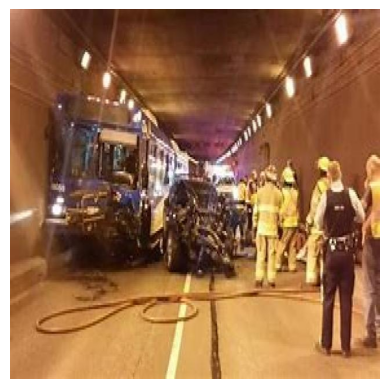

In [ ]:
import torchvision.transforms.functional as F
from PIL import Image

# Try displaying a sample image
image, target = train_dataset[0]

# Convert to tensor if it's a PIL Image
if isinstance(image, Image.Image):
    print("✅ Image is a PIL Image. Converting to tensor...")
    transform = transforms.ToTensor()
    image = transform(image)

print(f"✅ Sample image shape: {image.shape}")

# Convert tensor back to PIL Image before showing
import matplotlib.pyplot as plt
image_pil = F.to_pil_image(image)
# image_pil.show()  # Now it will work!

plt.imshow(image_pil)
plt.axis("off")
plt.show()


In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torchvision.transforms.functional as F
from PIL import Image

# Define dataset transform
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load COCO dataset
train_dataset = datasets.CocoDetection(
    root="/content/images_dataset/train",
    annFile="/content/images_dataset/train/_annotations.coco.json",
    transform=transform
)

# Custom collate function to handle varying annotation sizes
def collate_fn(batch):
    images, targets = zip(*batch)  # Unzip images and targets
    return list(images), list(targets)  # Keep them as lists

# Create DataLoader with collate_fn
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)

# Fetch a batch from DataLoader
images, targets = next(iter(train_loader))

# Convert to tensor if needed
if isinstance(images[0], Image.Image):
    images = [F.to_tensor(img) for img in images]  # Convert all images to tensors

print(f"✅ Batch loaded successfully! Number of images: {len(images)}")
print(f"✅ First image shape: {images[0].shape}")  # Now it should work
print(f"✅ First target sample: {targets[0]}")  # Display first target data


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
✅ Batch loaded successfully! Number of images: 4
✅ First image shape: torch.Size([3, 640, 640])
✅ First target sample: [{'id': 46, 'image_id': 22, 'category_id': 1, 'bbox': [91, 224, 337, 331.5], 'area': 111715.5, 'segmentation': [], 'iscrowd': 0}]


In [ ]:
import torchvision.transforms.functional as F

# Fetch a batch from DataLoader
images, targets = next(iter(train_loader))

# Convert to tensor if needed
if isinstance(images[0], Image.Image):
    images = [F.to_tensor(img) for img in images]  # Convert all images to tensors

print(f"✅ Batch loaded successfully! Number of images: {len(images)}")
print(f"✅ First image shape: {images[0].shape}")  # Now it should work


✅ Batch loaded successfully! Number of images: 4
✅ First image shape: torch.Size([3, 640, 640])


In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import os
from pycocotools.coco import COCO

# ✅ Define the dataset class
class TunnelDataset(Dataset):
    def __init__(self, root_dir, annotation_file, transform=None):
        self.root_dir = root_dir
        self.coco = COCO(annotation_file)  # Load COCO annotations
        self.image_ids = list(self.coco.imgs.keys())  # Get image IDs
        self.transform = transform

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        image_id = self.image_ids[idx]
        image_info = self.coco.loadImgs(image_id)[0]
        image_path = os.path.join(self.root_dir, image_info["file_name"])

        # Load image
        image = Image.open(image_path).convert("RGB")

        # Load annotations
        ann_ids = self.coco.getAnnIds(imgIds=image_id)
        annotations = self.coco.loadAnns(ann_ids)

        # Extract bounding boxes & labels
        boxes = []
        labels = []
        for ann in annotations:
            x, y, w, h = ann["bbox"]
            boxes.append([x, y, x + w, y + h])
            labels.append(ann["category_id"])

        # Convert to tensor
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        target = {"boxes": boxes, "labels": labels}

        # Apply transformations
        if self.transform:
            image = self.transform(image)

        return image, target


In [ ]:
from torch.utils.data import DataLoader

# ✅ Define transformations
transform = transforms.Compose([
    transforms.Resize((640, 640)),  # Resize images to 640x640
    transforms.ToTensor()  # Convert images to tensors
])

# ✅ Paths to annotation files
train_annotations = "/content/images_dataset/train/_annotations.coco.json"
valid_annotations = "/content/images_dataset/valid/_annotations.coco.json"

# ✅ Create training & validation datasets
train_dataset = TunnelDataset(root_dir="/content/images_dataset/train", annotation_file=train_annotations, transform=transform)
valid_dataset = TunnelDataset(root_dir="/content/images_dataset/valid", annotation_file=valid_annotations, transform=transform)

# ✅ Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=lambda batch: tuple(zip(*batch)))
valid_loader = DataLoader(valid_dataset, batch_size=2, shuffle=False, collate_fn=lambda batch: tuple(zip(*batch)))

print("✅ DataLoaders created successfully!")


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
✅ DataLoaders created successfully!


In [ ]:
import torchvision.transforms.functional as F

# ✅ Fetch a batch from DataLoader
images, targets = next(iter(train_loader))

# ✅ Convert to tensor if needed
if isinstance(images[0], Image.Image):
    images = [F.to_tensor(img) for img in images]

print(f"✅ Batch loaded successfully! Number of images: {len(images)}")
print(f"✅ First image shape: {images[0].shape}")  # Should be (3, 640, 640)


✅ Batch loaded successfully! Number of images: 2
✅ First image shape: torch.Size([3, 640, 640])


In [ ]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"


In [ ]:
device = torch.device("cpu")
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
num_classes = len(set(label for target in targets for label in target["labels"].tolist())) + 1
print(f"Detected {num_classes} classes.")


Detected 3 classes.


In [ ]:
import torch
import torch.optim as optim
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torchvision.transforms.functional as F

# ✅ Set device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Load pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")

# ✅ Modify the model for our dataset (2 classes: Normal & Accident)
num_classes = len(train_dataset.coco.getCatIds()) + 1  # Add 1 for background  # Background + 1 (Normal) + 1 (Accident)
print(f"Detected {num_classes} classes.")
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# ✅ Move model to device
model.to(device)

# ✅ Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# ✅ Training loop
num_epochs = 2  # Change as needed
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for images, targets in train_loader:
        # ✅ Ensure images are tensors before sending to device
        images = [img.to(device) if isinstance(img, torch.Tensor) else F.to_tensor(img).to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        optimizer.zero_grad()
        loss_dict = model(images, targets)
        loss = sum(loss for loss in loss_dict.values())

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"✅ Epoch {epoch+1}/{num_epochs}, Loss: {total_loss:.4f}")




Detected 4 classes.
✅ Epoch 1/2, Loss: 57.0681
✅ Epoch 2/2, Loss: 43.7021


In [ ]:
# ✅ Save the trained model
torch.save(model.state_dict(), "/content/faster_rcnn_tunnel.pth")
print("✅ Model training complete! Saved as faster_rcnn_tunnel.pth")

✅ Model training complete! Saved as faster_rcnn_tunnel.pth


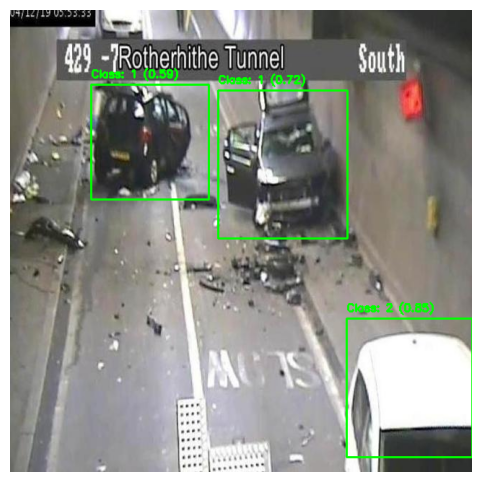

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

# ✅ Select a test image from the validation set
test_image, _ = valid_dataset[0]  # Pick the first image from the validation set

# ✅ Convert to tensor & move to device
test_image_tensor = test_image.to(device).unsqueeze(0)
model.eval()

# ✅ Run inference
with torch.no_grad():
    predictions = model(test_image_tensor)

# ✅ Extract boxes, scores, and labels
boxes = predictions[0]['boxes'].cpu().numpy()
scores = predictions[0]['scores'].cpu().numpy()
labels = predictions[0]['labels'].cpu().numpy()

# ✅ Convert tensor back to a NumPy image
test_image_pil = F.to_pil_image(test_image)  # Convert tensor to PIL image
test_image_np = np.array(test_image_pil)  # Convert PIL to NumPy

# ✅ Convert RGB to BGR for OpenCV
test_image_np = cv2.cvtColor(test_image_np, cv2.COLOR_RGB2BGR)

# ✅ Draw bounding boxes
for i, box in enumerate(boxes):
    if scores[i] > 0.5:  # Confidence threshold
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(test_image_np, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(test_image_np, f"Class: {labels[i]} ({scores[i]:.2f})",
                    (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# ✅ Show the image with detections
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(test_image_np, cv2.COLOR_BGR2RGB))  # Convert BGR back to RGB for display
plt.axis("off")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save the model in Google Drive
model.save('/content/drive/MyDrive/my_model')
torch.save(model.state_dict(), '/content/drive/MyDrive/my_model_weights.pth')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


AttributeError: 'FasterRCNN' object has no attribute 'save'

In [ ]:
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt
# import torchvision.transforms.functional as F

# # ✅ Select a test image from the validation set
# test_image, _ = valid_dataset[101]  # Pick the first image from the validation set

# # ✅ Convert to tensor & move to device
# test_image_tensor = test_image.to(device).unsqueeze(0)

# # ✅ Run inference
# with torch.no_grad():
#     predictions = model(test_image_tensor)

# # ✅ Extract boxes, scores, and labels
# boxes = predictions[0]['boxes'].cpu().numpy()
# scores = predictions[0]['scores'].cpu().numpy()
# labels = predictions[0]['labels'].cpu().numpy()

# # ✅ Convert tensor back to a NumPy image
# test_image_pil = F.to_pil_image(test_image)  # Convert tensor to PIL image
# test_image_np = np.array(test_image_pil)  # Convert PIL to NumPy

# # ✅ Convert RGB to BGR for OpenCV
# test_image_np = cv2.cvtColor(test_image_np, cv2.COLOR_RGB2BGR)

# # ✅ If no accident is detected, label the image as "Normal"
# if len(boxes) == 0:
#     print("✅ No accident detected. Displaying as 'Normal'.")
#     cv2.putText(test_image_np, "Normal (Class 0)", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

# # ✅ Draw bounding boxes if any accidents are found
# for i, box in enumerate(boxes):
#     if scores[i] > 0.5:  # Confidence threshold
#         x1, y1, x2, y2 = map(int, box)
#         cv2.rectangle(test_image_np, (x1, y1), (x2, y2), (0, 255, 0), 2)
#         label_text = f"Accident (Class 1) ({scores[i]:.2f})"
#         cv2.putText(test_image_np, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# # ✅ Show the image with detections
# plt.figure(figsize=(8, 6))
# plt.imshow(cv2.cvtColor(test_image_np, cv2.COLOR_BGR2RGB))  # Convert BGR back to RGB for display
# plt.axis("off")
# plt.show()


In [ ]:
# import torch
# import torchvision
# from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# # ✅ Set device (GPU if available, else CPU)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # ✅ Load the trained Faster R-CNN model
# model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")

# # ✅ Modify the model to match the trained version
# # num_classes = 2  # Background + 1 (Normal) + 1 (Accident)
# num_classes = len(train_dataset.coco.getCatIds()) + 1
# in_features = model.roi_heads.box_predictor.cls_score.in_features
# model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# # ✅ Load the trained weights
# model.load_state_dict(torch.load("/content/faster_rcnn_tunnel.pth", map_location=device))

# # ✅ Move model to device and set to evaluation mode
# model.to(device)
# model.eval()

# print("✅ Model loaded successfully!")
